In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# preparing data
def draw_data(n1, n2, m1, m2, S1, S2):
    data1 = np.random.multivariate_normal(m1, S1, n1)
    data2 = np.random.multivariate_normal(m2, S2, n2)

    data = np.concatenate((data1, data2), axis=0)
    data = pd.DataFrame(data, columns=["x", "y"])

    data["klasa"] = np.repeat([0, 1], [n1, n2])

    return data


m1, m2 = [-1, -1], [2, 2]
S1 = [[4, 2], [2, 4]]
n1, n2 = 30, 20

np.random.seed(129)
data = draw_data(n1, n2, m1, m2, S1, S1)
# training and validation datest
x_train, x_test, y_train, y_test = train_test_split(
    data[["x", "y"]], data["klasa"], test_size=0.2
)

In [3]:
# C values to be checked
C_values = np.logspace(-3, 3)

accuracies = []
margin_widths = []
classifiers = []
for c_val in C_values:
    # training
    clf = svm.SVC(kernel="linear", C=c_val)
    clf.fit(x_train, y_train)
    classifiers.append(clf)
    # validation
    y_pred = clf.predict(x_test)
    # accuracy
    accuracy = accuracy_score(y_pred, y_test) * 100
    accuracies.append(accuracy)
    # marig width
    w = clf.coef_[0]
    margin_width = 2 / np.linalg.norm(w)
    margin_widths.append(margin_width)

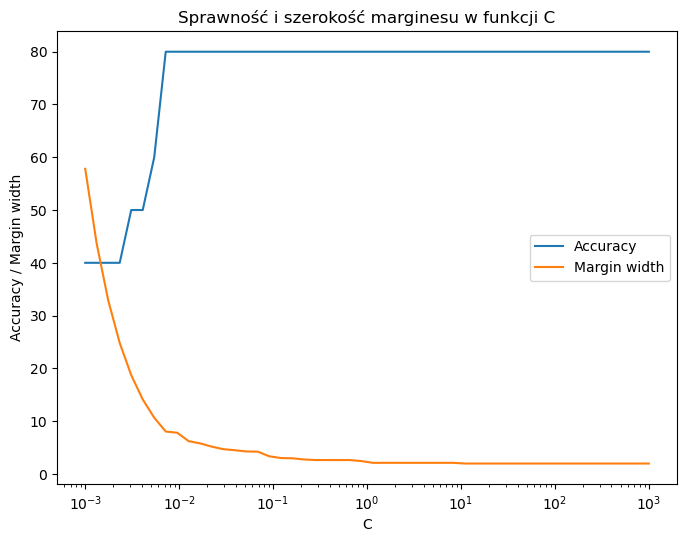

In [4]:
plt.figure(figsize=(8, 6), dpi=100)
plt.semilogx(C_values, accuracies, label="Accuracy")
plt.semilogx(C_values, margin_widths, label="Margin width")
plt.xlabel("C")
plt.ylabel("Accuracy / Margin width")
plt.title("Sprawność i szerokość marginesu w funkcji C")
plt.legend()
plt.show()

In [5]:
margin_widths[-1]

1.9643336961051463

Jak widzimy, powyzej $C = 10^-2$ sprawnośc pozostaje bez zmian na poziome około 80%, natomiast do $C = 10^1$ spada szerokość marginesu, osiągając wartość około 2

In [6]:
def show_boundary(clf):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    b = clf.intercept_[0]
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        data[["x", "y"]],
        response_method="predict",
        alpha=0.4,
        cmap=plt.cm.coolwarm,
        grid_resolution=1000,
    )
    plt.scatter(data.x, data.y, c=data["klasa"], edgecolor="k", cmap=plt.cm.coolwarm)
    plt.axline((0, -b / w[1]), slope=a, c="black")
    plt.axline((0, (1 - b) / w[1]), slope=a, ls="--", color="red")
    plt.axline((0, (-1 - b) / w[1]), slope=a, ls="--")
    plt.ylim((-5.5, 6.5))

Mozemy tez podejrzec jak wygladaja rezultaty dla skrajnych wartości C

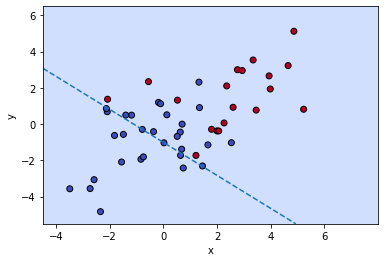

In [7]:
show_boundary(classifiers[0])

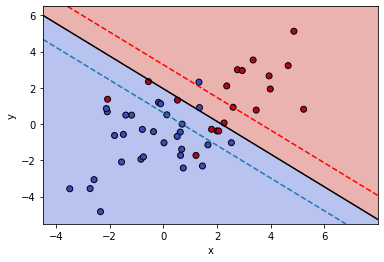

In [8]:
show_boundary(classifiers[-1])